import mne
import numpy as np


In [4]:
filename = "0-raw.fif"
raw = mne.io.read_raw_fif(filename)


Opening raw data file 0-raw.fif...
    Range : 0 ... 1672749 =      0.000 ...  6690.996 secs
Ready.


In [5]:
#crop 60 seconds of raw data
raw.crop(tmax=60)
raw.load_data()

Reading 0 ... 15000  =      0.000 ...    60.000 secs...


Measurement date,"February 03, 2022 18:12:53 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,131 points
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


In [6]:
import matplotlib.pyplot as plt

Using matplotlib as 2D backend.


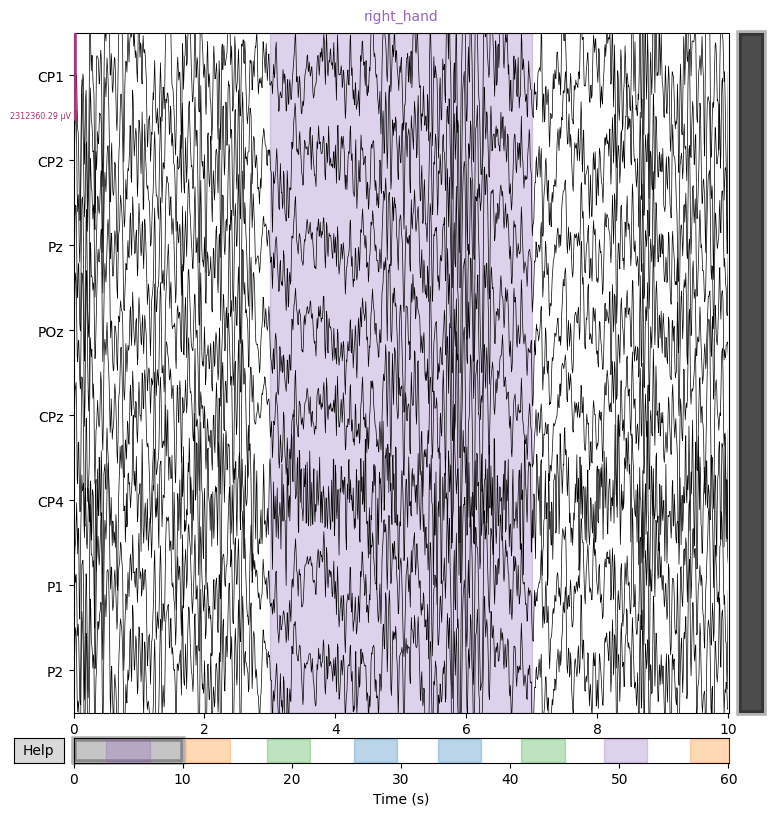

In [7]:
raw.plot(scalings="auto")
plt.show()

In [8]:
filt_raw = raw.copy().filter(l_freq=1.0, h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



Fitting ICA

In [17]:
from mne.preprocessing import ICA
ica = ICA(n_components=5, max_iter="auto", random_state=97)
ica.fit(filt_raw)
ica

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.1s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,14 iterations on raw data (15001 samples)
ICA components,5
Available PCA components,8
Channel types,eeg
ICA components marked for exclusion,—


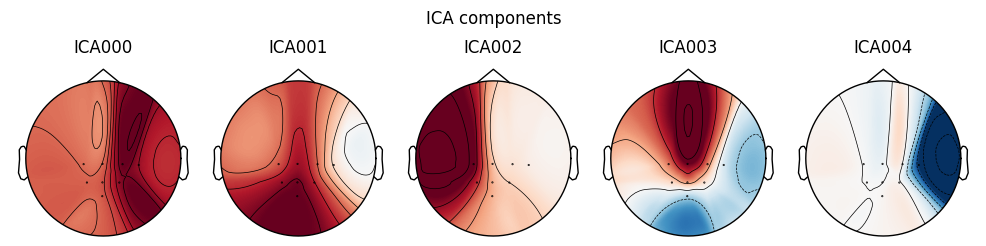

In [18]:
ica.plot_components()
plt.show()

In [19]:
Explain_ICA = ica.get_explained_variance_ratio(filt_raw)

In [20]:
Explain_ICA

{'eeg': 0.9656900359429734}

Creating RawArray with float64 data, n_channels=5, n_times=15001
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.


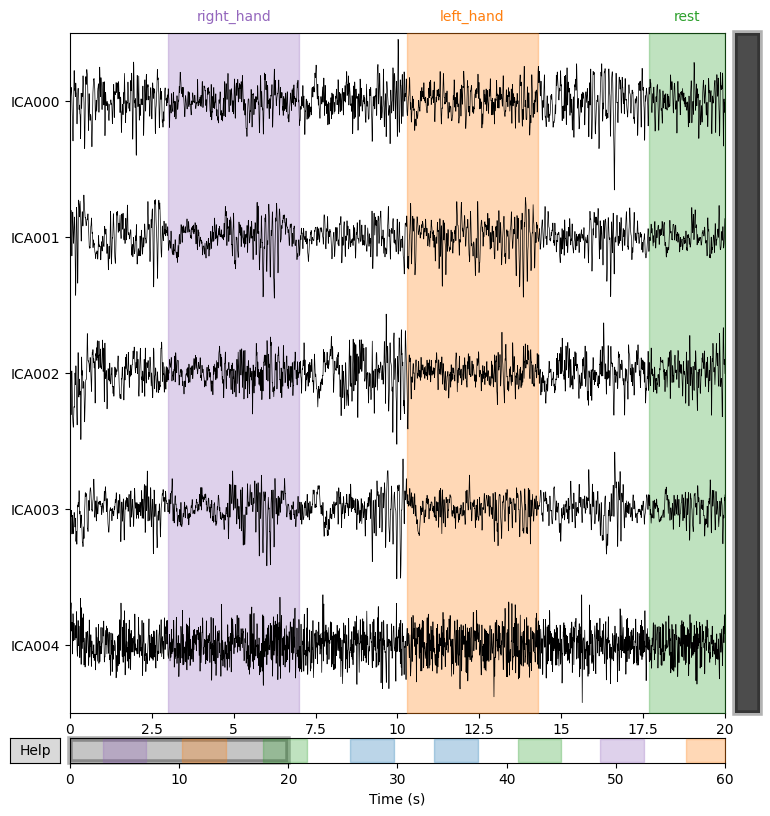

In [21]:
ica.plot_sources(filt_raw)
plt.show()

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 1 ICA component
    Projecting back using 8 PCA components


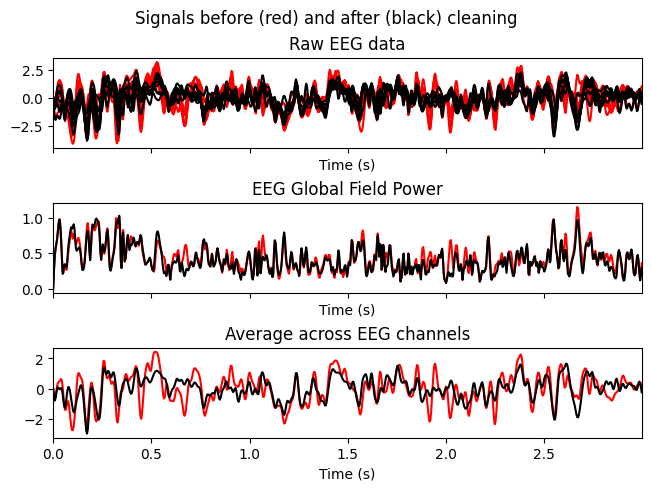

In [30]:
ica.plot_overlay(filt_raw, exclude=[0])
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


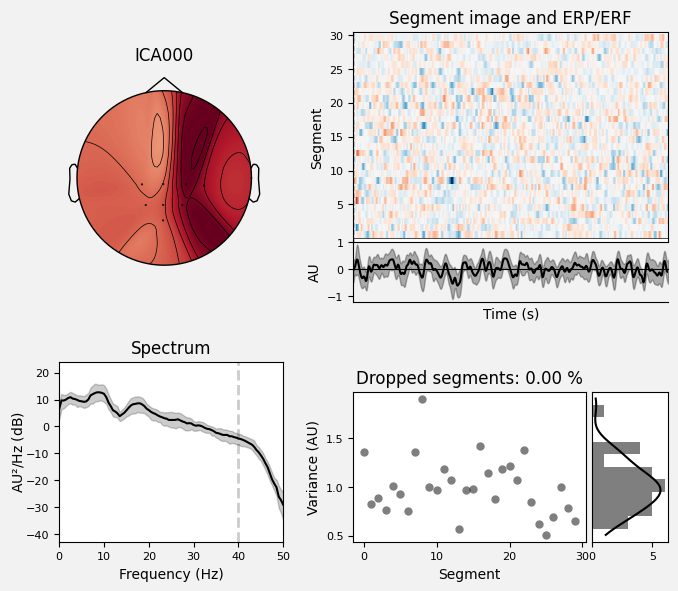

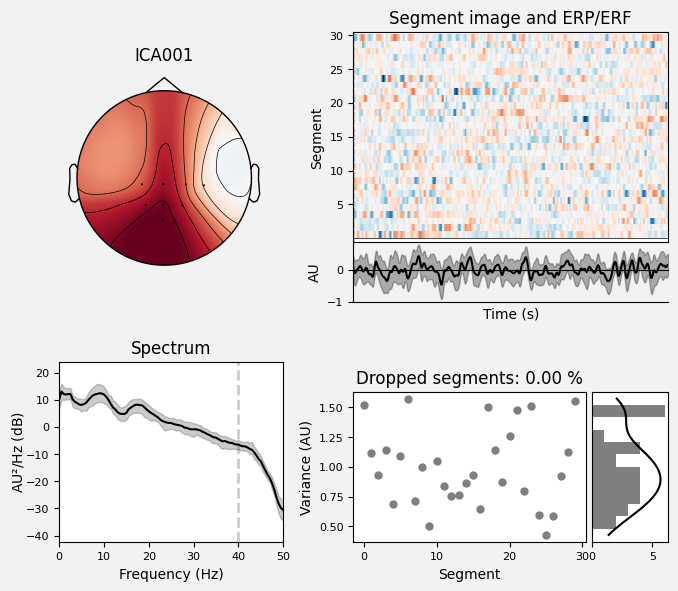

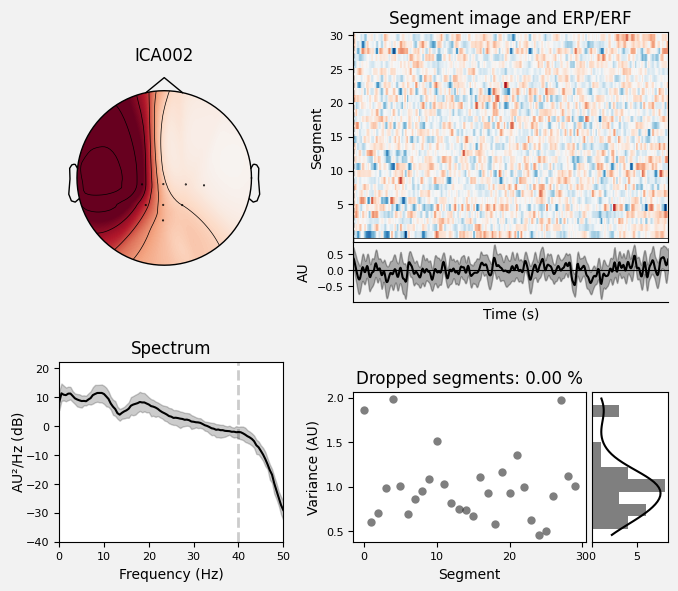

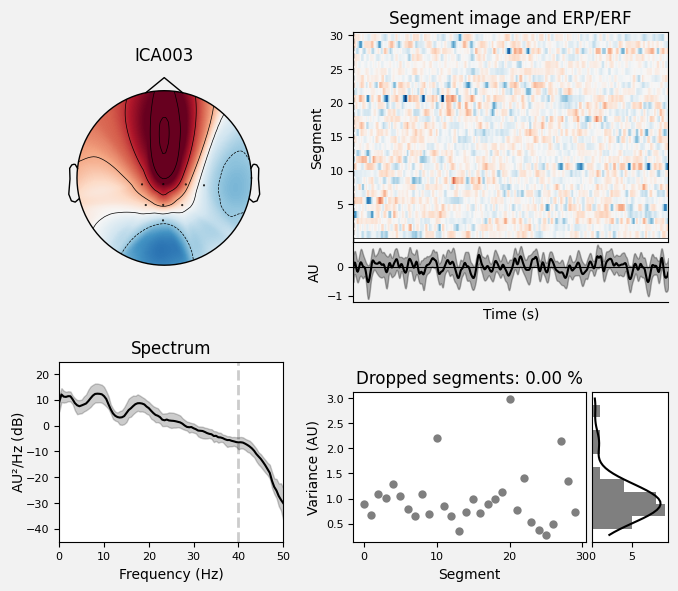

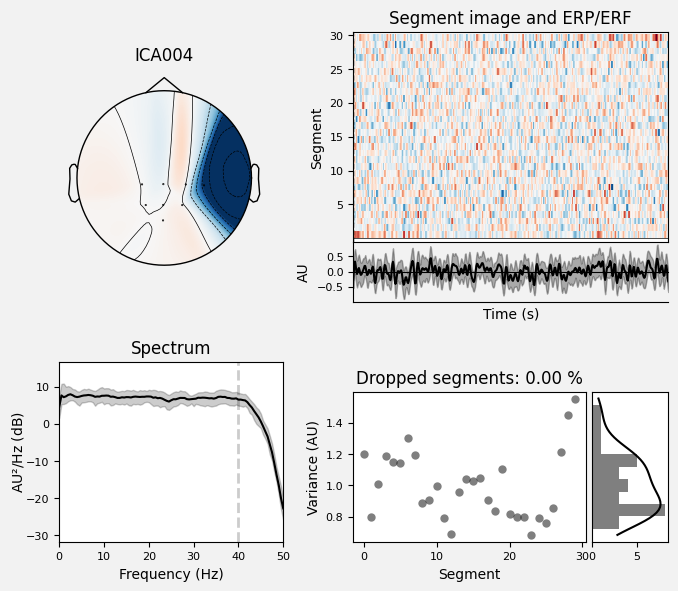

In [31]:
ica.plot_properties(filt_raw)
plt.show()

Selecting ICA components manually

In [32]:
ica.exclude=[0,1]

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 2 ICA components
    Projecting back using 8 PCA components


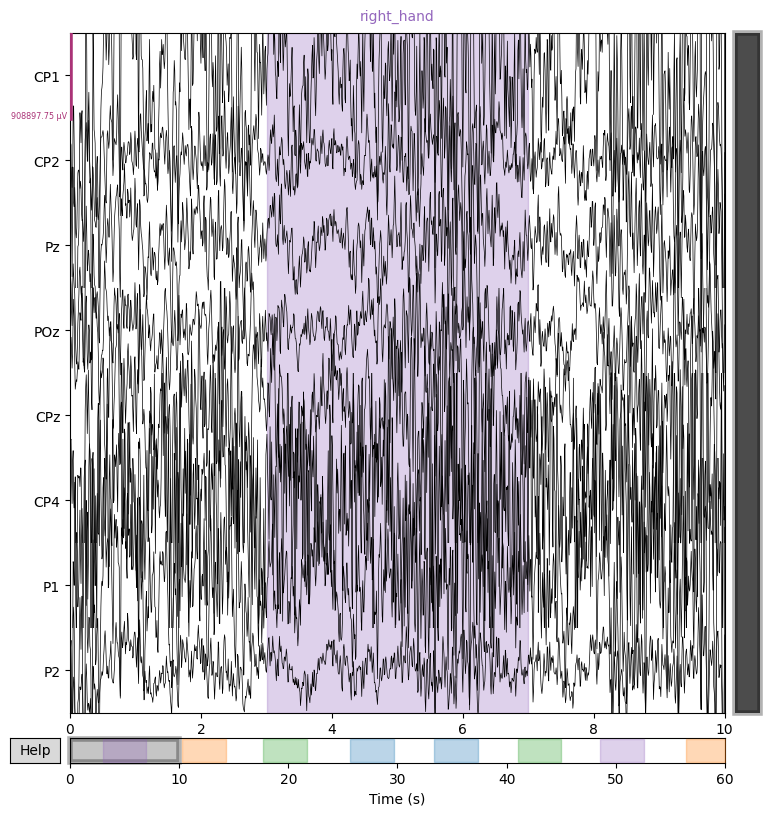

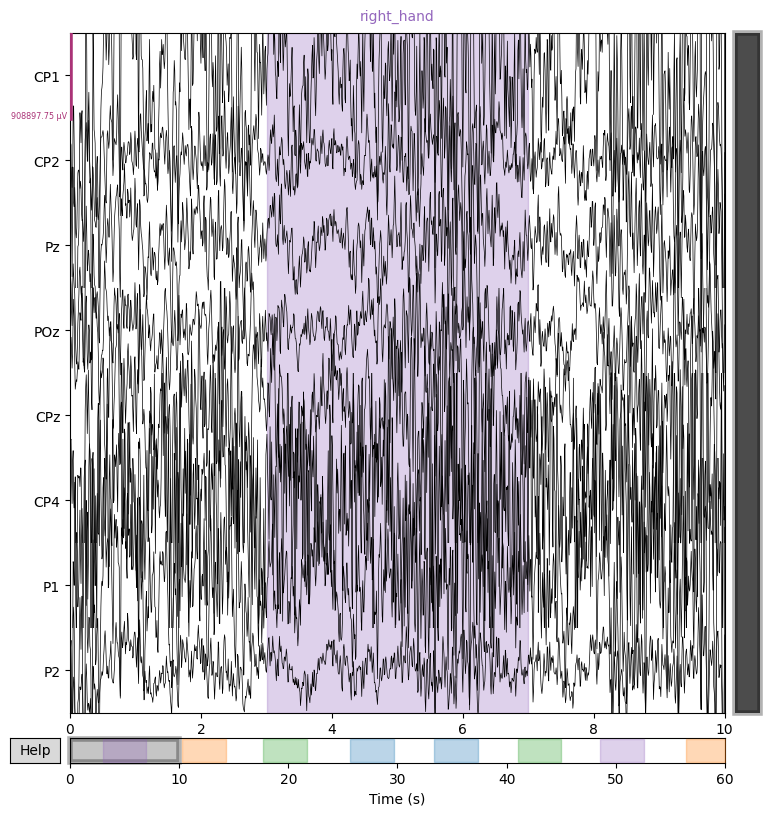

In [35]:
ica.apply(filt_raw).plot(scalings="auto")

Selecting ICA components using template matching

In [61]:
raws = list()
icas = list()

for subj in range(4):
    #2-class motor imagery EEG dtaset with two classes of left/right hand movement
    fname = mne.datasets.eegbci.load_data(subj+1, runs=[3])[0]
    raw = mne.io.read_raw_edf(fname).load_data().resample(50)
    #standardization
    mne.datasets.eegbci.standardize(raw)
    raw.set_montage("standard_1005")
    
    #high-pass filter
    raw_filt = raw.copy().load_data().filter(l_freq=1.0, h_freq=None)
    #fitting ICA for each subject
    ica = ICA(n_components=20, max_iter="auto", random_state=97)
    ica.fit(raw_filt)
    raws.append(raw)
    icas.append(ica)

Extracting EDF parameters from /Users/homa/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 165 samples (3.300 s)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.2s.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Extracting EDF parameters from /Users/homa/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 165 samples (3.300 s)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Extracting EDF parameters from /Users/homa/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S003/S003R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 165 samples (3.300 s)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 3.8s.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Extracting EDF parameters from /Users/homa/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S004/S004R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 165 samples (3.300 s)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 2.9s.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [62]:
raws

[<RawEDF | S001R03.edf, 64 x 6250 (125.0 s), ~3.1 MB, data loaded>,
 <RawEDF | S002R03.edf, 64 x 6150 (123.0 s), ~3.1 MB, data loaded>,
 <RawEDF | S003R03.edf, 64 x 6250 (125.0 s), ~3.1 MB, data loaded>,
 <RawEDF | S004R03.edf, 64 x 6150 (123.0 s), ~3.1 MB, data loaded>]

In [63]:
icas

[<ICA | raw data decomposition, method: fastica (fit in 28 iterations on 6250 samples), 20 ICA components (64 PCA components available), channel types: eeg, no sources marked for exclusion>,
 <ICA | raw data decomposition, method: fastica (fit in 52 iterations on 6150 samples), 20 ICA components (64 PCA components available), channel types: eeg, no sources marked for exclusion>,
 <ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 6250 samples), 20 ICA components (64 PCA components available), channel types: eeg, no sources marked for exclusion>,
 <ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 6150 samples), 20 ICA components (64 PCA components available), channel types: eeg, no sources marked for exclusion>]

In [64]:
from mne.preprocessing import corrmap

Using EOG channel: Fpz
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 500 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- F

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


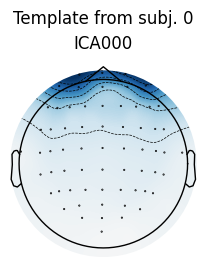

Median correlation with constructed map: 0.969
Displaying selected ICs per subject.
At least 1 IC detected for each subject.


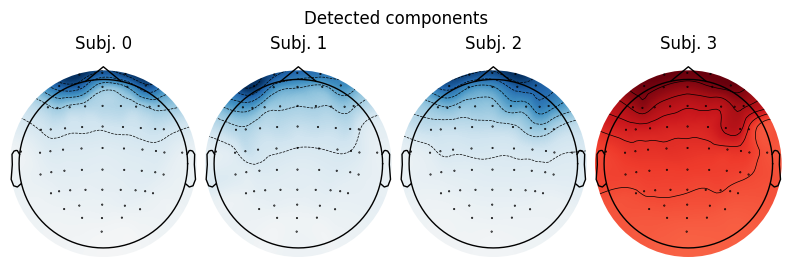

(<MNEFigure size 195x260.5 with 1 Axes>,
 <MNEFigure size 780x260.5 with 4 Axes>)

In [69]:
# use the first subject as template; use Fpz as proxy for EOG
raw = raws[0]
ica = icas[0]
eog_inds, eog_scores = ica.find_bads_eog(raw, ch_name="Fpz")
corrmap(icas, template=(0,0))